<a href="https://colab.research.google.com/github/NunezKant/iGEDS/blob/master/Global_Ecosystems_Dynamics_Initiative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def loader(url):
  df = pd.read_csv(url, decimal=",")
  all_columns = df.columns.values.tolist()
  metrics = ["Metrics","México","Argentina","Chile","Brasil","España"]
  df_metrics = df[metrics]
  df_pilars = df[["Pilar","Metrics"]]
  column_names = df["Metrics"].values
  df_metrics = df_metrics.T
  df_metrics.columns = column_names
  df_metrics.drop("Metrics", axis = 0, inplace = True)
  for col,val1,val2 in zip(df_metrics.columns, df['Min Possible Value'],df['Max Possible Value']):
   df_metrics[col] = df_metrics[col].apply(lambda x: (x-val1)/(val2-val1))

  df_metrics = np.round(df_metrics*5,2)

  from sklearn.impute import KNNImputer
  imputer = KNNImputer(n_neighbors=2)
  var = imputer.fit_transform(df_metrics)
  df_imputed = pd.DataFrame(var)
  df_imputed.columns = column_names
  df_imputed.index = df_metrics.index
  
  return df_imputed,df_pilars

In [0]:
df_metrics,df_pilars = loader("https://raw.githubusercontent.com/NunezKant/iGEDS/master/iEcosystems%20-%20Corrected.csv")

In [22]:
df_metrics

,Entrepreneurial intentions (GEM),Fear of failure (GEM),Entrepreneurship as a Good Career choice (GEM),High Status to Successful Entrepreneurs (GEM),Business Freedom (Heritage Foundation),Attitudes towards Entrepreneurial Risk (OECD),Male Attitudes towards Entrepreneurial Risk (OECD),Female Attitudes towards Entrepreneurial Risk (OECD),Buyer sophistication (GCI),Domestic Market Scale (GII),Easy Access to Loans (GCI),Venture capital (VC) availability (GCI),Ease of Credit (GII),VC deals (GII),Entrepreneurship perceived capabilities (GEM),% school grads in tertiary education (GII),Logistics performance (World Bank),Electricity & telephony infrastructure (GCI),Number of internet users (UN),Ease of doing business (WB),Starting a business (WB),Paying taxes (WB),Resolving Insolvency (WB),Enforcing contracts (WB),Property Rights (IEF),Government Integrity (IEF),Labor Freedom (IEF),Trade freedom (IEF),Corruption Perceptions Index (TI),Quality of scientific research institutions (GCI),Graduates in science & engineering (%) (GII),Government procurement of advanced technology (GCI),University-industry research collaborations (GII),"Trade, Competition & Market scale (GII)",R&D expenditure as a % GDP (UNESCO),R&D expenditure in '000 current PPP$ (UNESCO),Public R&D Expenditure as % of total R&D expenditure (UNESCO),Business Expenditure as % of total R&D expenditure (UNESCO),Quality of STEM education (GCI),Availability of Scientists & Engineers (GCI),Researchers/Professionals engaged in R&D per million population (GII),"STEM Graduates per capita (OECD) - Natural sciences, mathematics and statistics",Internet Bandwidth (GCI),Production Process Sophistication (GCI),Availability of latest technologies (GCI),ICT access (GII),GDP per capita,Social Progress Index,Inclusive Development Index,SDG 1 - No poverty,SDG 2 - Zero Hunger,SDG 8 - Decent Jobs and Economic Growth,SDG 8 - Decent Jobs and Economic Growth_2,"SDG 9 - Industry, Innovation and Infrastructure",SDG 11 - Sustainable Cities and Communities,SDG 11 - Sustainable Cities and Communities_2,SDG 12 - Responsible Consumption and Production,Global Entrepreneurship Index,Leading current economic clusters
México,0.82,2.39,3.40,3.38,3.35,2.55,3.140,3.07,2.19,3.87,2.27,1.91,4.50,0.06,3.53,1.45,3.50,4.38,3.29,3.62,4.30,3.29,3.51,3.35,2.92,1.84,2.92,4.38,1.40,1.45,2.30,1.75,2.19,3.98,0.02,0.90,0.01,1.820,2.58,2.65,0.14,1.25,2.75,2.75,3.33,2.74,0.42,3.52,2.60,0.12,0.19,1.54,0.17,0.01,0.80,1.00,0.40,1.32,2.74
Argentina,0.74,1.60,2.97,2.50,3.01,2.54,3.315,3.03,2.07,3.36,1.36,1.10,2.75,0.10,2.44,3.51,2.41,4.44,3.71,2.95,4.02,2.46,2.00,2.88,2.52,2.49,2.33,3.46,2.00,0.99,0.99,1.50,1.88,3.06,0.03,0.39,0.01,2.410,2.65,2.66,0.74,0.70,2.90,2.33,2.67,3.66,0.50,3.84,2.61,0.02,0.19,3.74,0.42,0.01,0.74,0.59,0.56,1.20,2.04
Chile,2.88,2.90,3.72,3.73,3.75,2.70,3.750,3.54,2.47,3.04,2.62,2.31,2.75,0.15,3.78,3.61,2.85,4.80,4.12,3.63,4.57,3.76,3.00,3.24,3.50,3.67,3.24,4.45,3.35,0.78,1.60,1.50,2.19,3.66,0.02,0.12,0.01,0.660,2.98,3.22,0.30,1.30,3.16,2.83,3.83,3.64,0.69,4.00,2.87,0.03,0.16,1.30,0.35,0.01,0.45,1.05,2.07,2.92,2.28
Brasil,1.51,1.78,3.76,3.61,3.02,2.56,3.490,2.99,2.15,4.00,2.09,1.74,2.50,0.09,3.10,1.98,2.75,4.26,3.52,2.96,4.06,1.72,2.52,3.20,2.86,2.28,2.48,3.39,1.75,3.17,1.21,1.42,2.12,3.50,0.06,3.28,0.01,2.115,1.84,1.98,0.52,0.85,2.90,2.42,2.92,3.08,0.38,3.64,2.44,0.01,0.64,0.24,0.82,0.57,0.64,0.24,0.12,1.02,2.44
España,0.37,2.41,2.87,2.89,3.34,2.30,2.690,2.29,2.20,3.72,2.72,2.36,3.00,0.59,2.54,3.60,3.47,4.85,4.30,3.90,4.35,4.23,3.96,3.55,3.75,2.76,2.88,4.32,2.90,5.00,2.07,1.75,2.11,3.93,0.06,1.75,0.03,0.890,2.90,3.02,1.74,1.45,3.91,3.17,3.67,4.03,1.33,4.37,2.83,0.15,0.86,0.26,0.39,0.47,0.39,0.05,0.12,2.26,2.76


In [0]:
df_means = pd.concat([df_pilars,df_metrics.T.reset_index()], axis = 1).drop("index", axis = 1).groupby("Pilar").mean()


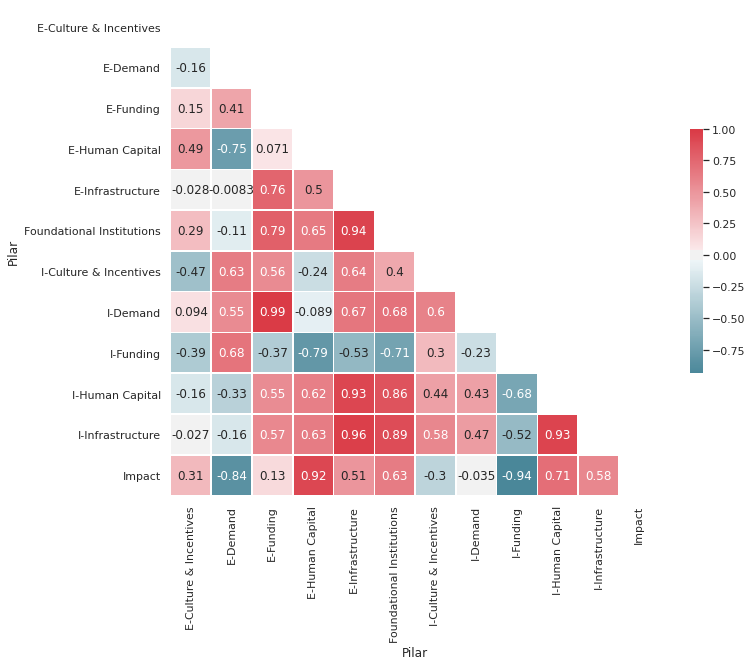

In [62]:
import seaborn as sns
sns.set(style="white")


# Compute the correlation matrix
corr = df_means.T.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

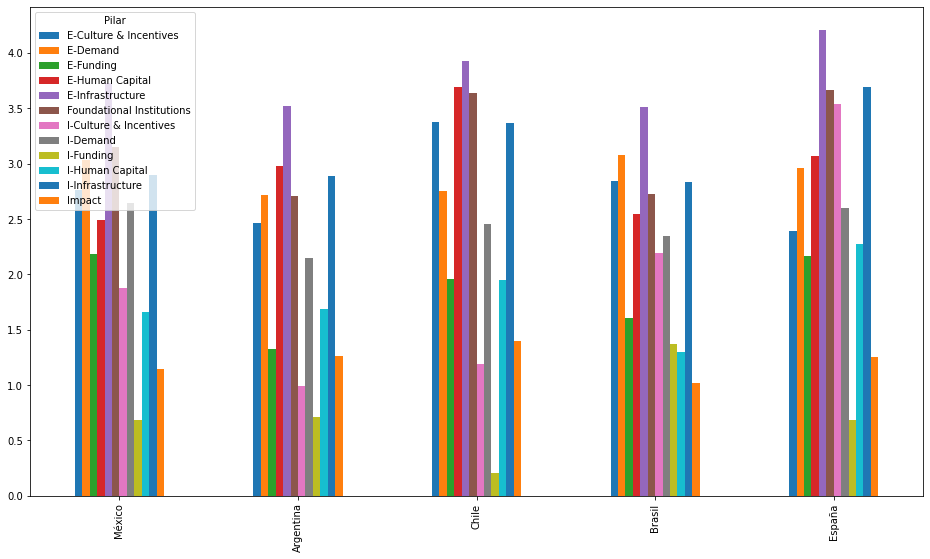

In [55]:
df_means.T.plot(kind = "bar", figsize = (16,9))

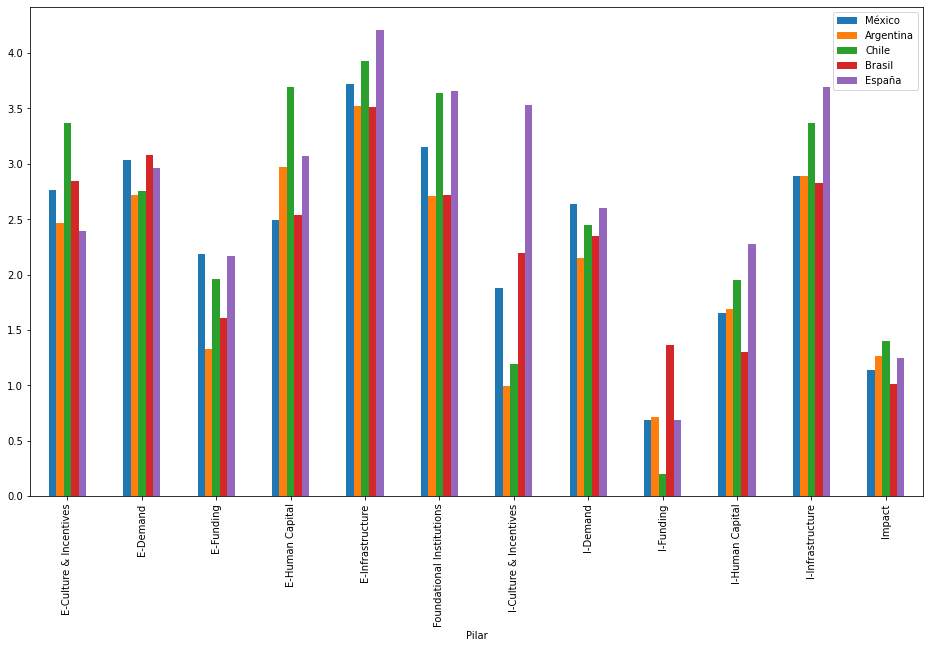

In [54]:
df_means.plot(kind = "bar", figsize = (16,9))